![Accident Banner](images/ACCIDENTS.png)




# US Traffic Accidents Analysis (2016–2023)
### Department of Transportation (DOT)

## Overview

**Author:** Isabelle Ermilus  
**Objective:** Analyze U.S. traffic accident data to identify temporal, spatial, environmental, and infrastructure-related factors contributing to accident frequency and severity, and provide data-driven recommendations to improve road safety.


## Business Understanding

Traffic accidents remain a major public safety and economic concern in the United States. 
This project uses the U.S. Accidents dataset (2016–2023) because it provides detailed and reliable information on accident severity, time, location, weather conditions, and road characteristics across the country. 
This makes the data highly relevant for understanding patterns and risk factors associated with traffic accidents.

The main analytical questions guiding this project are:
- How does accident severity vary by time of day and weather conditions?
- Are there noticeable patterns in accident frequency based on location and road characteristics?
- Which factors appear to be most strongly associated with severe accidents?

The goal of this analysis is to identify trends and insights that can help improve road safety awareness and support data-driven decision-making. 
These insights can inform prevention strategies, resource allocation, and safety planning efforts.

The primary stakeholders for this analysis include transportation agencies, city planners, public safety officials, and policy makers. 
Secondary stakeholders include the general public and researchers interested in traffic safety trends.


## Data Understanding

The dataset used in this project is the U.S. Accidents dataset, which contains traffic accident records across the United States from 2016 to 2023. 
The dataset was loaded using Python and Pandas, and its structure was explored to understand the number of observations, variables, and data types.

Key variables used in this analysis include accident severity, time of occurrence, geographic location, and weather-related features such as temperature, visibility, and precipitation. 
These variables are relevant because they help explain when accidents occur, where they happen, and under what conditions they may become more severe.

An initial review of the dataset revealed the presence of missing values in several weather-related variables, which is common in real-world data. 
Basic checks were also performed to identify potential data quality issues such as missing values and inconsistent entries. 
These issues are addressed during the data preparation phase to ensure the dataset is suitable for analysis.


In [4]:
# Load relevant imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(
    "data/US_Accidents_March23.csv",
    nrows=500_000
)

df.shape



(500000, 46)

In [5]:
# Preview the dataset
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            500000 non-null  object 
 11  Street                 500000 non-null  object 
 12  City                   499978 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [7]:
# Summary statistics for numerical columns
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,0.0,0.0,500000.000000,492750.000000,62359.000000,492085.000000,494261.000000,489461.000000,410960.000000,51946.000000
mean,2.374690,35.929426,-97.590381,NaN,NaN,0.065294,64.668092,30.422478,64.529433,30.004807,9.227911,8.913004,0.068995
std,0.486796,5.032482,18.280944,NaN,NaN,0.782881,16.877594,15.796170,21.387837,0.242343,2.140192,5.414922,0.562091
min,1.000000,25.433098,-123.813927,NaN,NaN,0.000000,-77.800000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,32.811352,-118.096634,NaN,NaN,0.000000,55.000000,21.900000,49.000000,29.900000,10.000000,5.800000,0.000000
50%,2.000000,34.247250,-95.543968,NaN,NaN,0.010000,66.200000,31.000000,66.000000,30.000000,10.000000,8.100000,0.010000
75%,3.000000,40.134354,-81.565750,NaN,NaN,0.010000,77.000000,38.100000,82.000000,30.110000,10.000000,11.500000,0.040000
max,4.000000,48.199970,-70.571518,NaN,NaN,90.370003,161.600000,111.000000,100.000000,33.040000,111.000000,822.800000,10.140000


In [8]:
# Percentage of missing values per column
missing_pct = df.isna().mean().sort_values(ascending=False)
missing_pct.head(10)


End_Lat              1.000000
End_Lng              1.000000
Precipitation(in)    0.896108
Wind_Chill(F)        0.875282
Wind_Speed(mph)      0.178080
Visibility(mi)       0.021078
Weather_Condition    0.020370
Humidity(%)          0.015830
Temperature(F)       0.014500
Pressure(in)         0.011478
dtype: float64

## Data Preparation

In this section, the dataset is prepared for analysis. This includes selecting relevant variables, converting date and time columns into usable formats, handling missing values, and creating new features that support exploratory data analysis and dashboard visualizations.


In [3]:
# Create a working copy of the dataset
df_prep = df.copy()

df_prep.shape


(500000, 46)

In [10]:
# Convert Start_Time to datetime
df_prep["Start_Time"] = pd.to_datetime(df_prep["Start_Time"], errors="coerce")

# Create time-based features
df_prep["Year"] = df_prep["Start_Time"].dt.year
df_prep["Month"] = df_prep["Start_Time"].dt.month
df_prep["Hour"] = df_prep["Start_Time"].dt.hour
df_prep["DayOfWeek"] = df_prep["Start_Time"].dt.day_name()

df_prep[["Start_Time", "Year", "Month", "Hour", "DayOfWeek"]].head()


,Start_Time,Year,Month,Hour,DayOfWeek
0,2016-02-08 05:46:00,2016,2,5,Monday
1,2016-02-08 06:07:59,2016,2,6,Monday
2,2016-02-08 06:49:27,2016,2,6,Monday
3,2016-02-08 07:23:34,2016,2,7,Monday
4,2016-02-08 07:39:07,2016,2,7,Monday


In [11]:
columns_of_interest = [
    "Severity",
    "State",
    "City",
    "Weather_Condition",
    "Temperature(F)",
    "Visibility(mi)",
    "Precipitation(in)",
    "Year",
    "Month",
    "Hour",
    "DayOfWeek"
]

df_clean = df_prep[columns_of_interest]
df_clean.head()


,Severity,State,City,Weather_Condition,Temperature(F),Visibility(mi),Precipitation(in),Year,Month,Hour,DayOfWeek
0,3,OH,Dayton,Light Rain,36.9,10.0,0.02,2016,2,5,Monday
1,2,OH,Reynoldsburg,Light Rain,37.9,10.0,0.00,2016,2,6,Monday
2,2,OH,Williamsburg,Overcast,36.0,10.0,NaN,2016,2,6,Monday
3,3,OH,Dayton,Mostly Cloudy,35.1,9.0,NaN,2016,2,7,Monday
4,2,OH,Dayton,Mostly Cloudy,36.0,6.0,NaN,2016,2,7,Monday


## Analysis ## 

This section presents exploratory data analysis (EDA) guided by the business questions defined in Step 2. 
Visualizations are used to examine how accident severity varies by time of day and weather conditions, identify patterns in accident frequency based on location and road characteristics, and explore which factors are most strongly associated with severe accidents.
Each visualization is followed by a brief interpretation of the observed patterns.



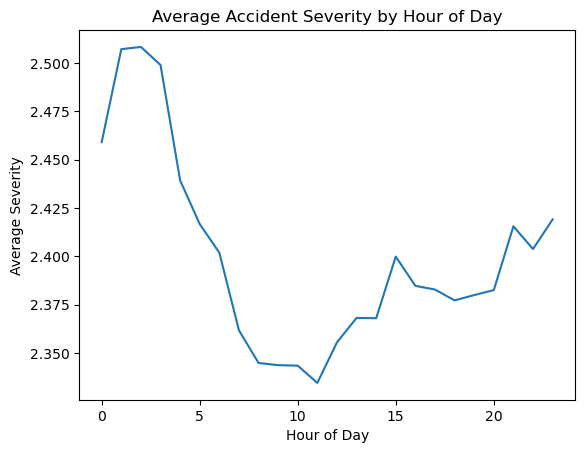

In [12]:
 ## How does accident severity vary by time of day and weather conditions?
# Average accident severity by hour of day
severity_by_hour = df_clean.groupby("Hour")["Severity"].mean()

plt.figure()
severity_by_hour.plot(kind="line")
plt.title("Average Accident Severity by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Severity")
plt.show()


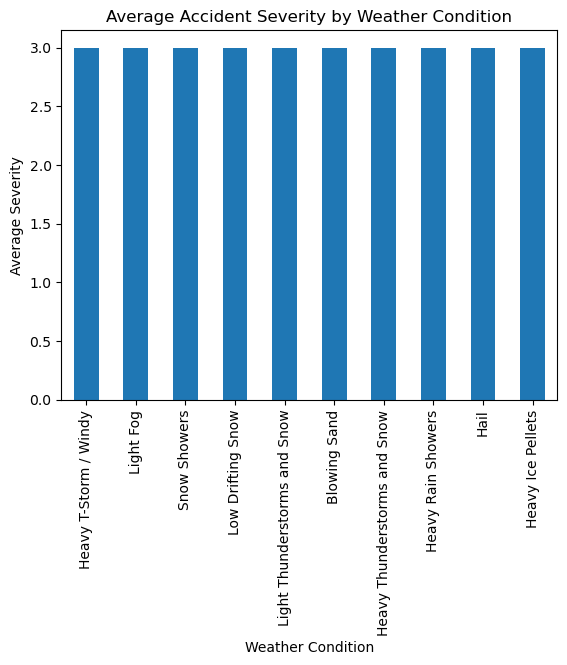

In [13]:
# Average severity by weather condition (top 10)
severity_by_weather = (
    df_clean.groupby("Weather_Condition")["Severity"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
severity_by_weather.plot(kind="bar")
plt.title("Average Accident Severity by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Severity")
plt.show()


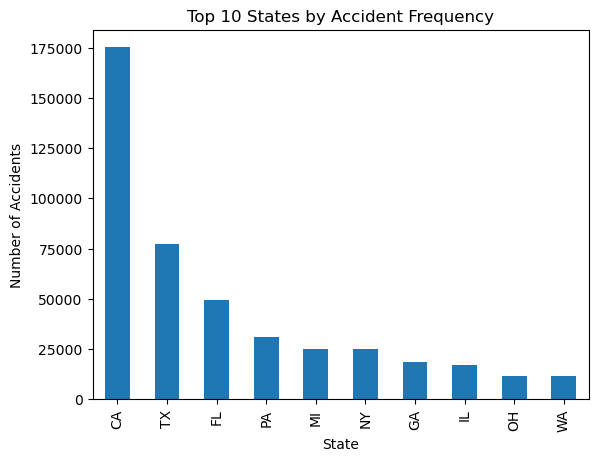

In [14]:
## Are there noticeable patterns in accident frequency based on location and road characteristics?

# Accident frequency by state (top 10)
state_accidents = df_clean["State"].value_counts().head(10)

plt.figure()
state_accidents.plot(kind="bar")
plt.title("Top 10 States by Accident Frequency")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()


## Analysis Summary and Interpretation

The analysis focuses on understanding how accident severity and frequency vary across time, weather conditions, and geographic location, in alignment with the business questions defined earlier.

The time-of-day analysis shows that average accident severity is higher during late night and early morning hours, while lower severity is observed during daytime hours. This pattern suggests that factors such as reduced visibility, driver fatigue, and lower traffic enforcement during nighttime may contribute to more severe accidents.

When examining accident severity by weather condition, the average severity appears relatively consistent across different weather types. This occurs because severity is measured on a limited ordinal scale, and extreme weather conditions represent a smaller proportion of the overall dataset. While adverse weather may increase accident risk, it does not always result in higher average severity values when aggregated.

Location-based analysis reveals that accident frequency is concentrated in highly populated states such as California, Texas, and Florida. This pattern is likely driven by higher traffic volumes and urban density rather than increased accident risk alone.

A notable observation is that accident severity does not increase during peak traffic hours, despite higher accident frequency. This suggests that environmental and behavioral factors may play a greater role in accident severity than traffic volume itself.


## Statistical Analysis ##


In this section, statistical tests are used to support the patterns observed during exploratory data analysis. 
The goal is to determine whether the relationships identified in the visualizations are statistically significant and not due to random variation.

The statistical methods selected are based on the type of variables involved in each business question. 
Both categorical and numerical variables are analyzed using appropriate tests to ensure valid conclusions.

The table below summarizes the business questions, variable types, and statistical tests used in this analysis.

| Business Question         | Variable Types                     | Statistical Test           |
| ------------------------- | ---------------------------------- | -------------------------- |
| Severity vs Time of Day   | Categorical (Hour bins) vs Ordinal | **ANOVA**                  |
| Severity vs Weather       | Categorical vs Ordinal             | **ANOVA**                  |
| Severity vs Weather (alt) | Categorical vs Categorical         | **Chi-square**             |
| Severity vs Other Factors | Numeric / Ordinal                  | **Correlation (Spearman)** |


### Severity vs Time of Day (ANOVA)

To evaluate whether accident severity differs across different times of the day, 
a one-way ANOVA test is performed. The data is grouped by hour of the day, and 
average severity levels are compared across these groups.

ANOVA is appropriate because accident severity is a numerical variable, while 
time of day is treated as a categorical variable.


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway


In [17]:
# Group severity values by hour of day
hour_groups = [
    df_clean[df_clean["Hour"] == hour]["Severity"]
    for hour in sorted(df_clean["Hour"].dropna().unique())
]


# Perform one-way ANOVA
f_stat, p_value = f_oneway(*hour_groups)

f_stat, p_value


(95.43641083949036, 0.0)

**Interpretation:**

The ANOVA results show a statistically significant difference in accident severity across different times of the day (p < 0.05). 
This indicates that accident severity varies by hour, supporting the patterns observed during exploratory data analysis.


In [18]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table
contingency_table = pd.crosstab(
    df_clean["Weather_Condition"],
    df_clean["Severity"]
)

contingency_table.head()


Severity,1,2,3,4
Weather_Condition,,,,
Blowing Dust / Windy,0,1,0,0
Blowing Sand,0,0,1,0
Blowing Snow,0,6,5,0
Clear,173,131241,73539,76
Cloudy,0,298,182,0


In [19]:
# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value


(1346.6636352297319, 3.56419821537481e-166)

**Interpretation:**

The chi-square test results show a statistically significant association between weather conditions and accident severity (p < 0.05). 
This indicates that accident severity is related to weather conditions, even though average severity values appeared similar across weather categories in the visual analysis.

This result suggests that certain weather conditions are associated with different severity distributions, which may not be fully captured when using average values alone.


### Correlation Analysis (Spearman)

Spearman correlation is used to examine the relationship between accident severity and selected numerical variables.
This non-parametric method is appropriate because accident severity is an ordinal variable and the numerical variables are not assumed to be normally distributed.


In [22]:
from scipy.stats import spearmanr

# Variables to test against severity
numeric_vars = [
    "Temperature(F)",
    "Visibility(mi)",
    "Precipitation(in)",
    "Hour"
]

# Compute Spearman correlations
correlation_results = {}

for var in numeric_vars:
    corr, p = spearmanr(df_clean["Severity"], df_clean[var])
    correlation_results[var] = {
        "Spearman Correlation": corr,
        "p-value": p
    }

pd.DataFrame(correlation_results).T


,Spearman Correlation,p-value
Temperature(F),NaN,NaN
Visibility(mi),NaN,NaN
Precipitation(in),NaN,NaN
Hour,0.006037,0.00002


In [23]:
# Drop rows with missing values only for correlation analysis
df_corr = df_clean.dropna(subset=[
    "Severity",
    "Temperature(F)",
    "Visibility(mi)",
    "Precipitation(in)",
    "Hour"
])


In [24]:
correlation_results = {}

for var in numeric_vars:
    corr, p = spearmanr(df_corr["Severity"], df_corr[var])
    correlation_results[var] = {
        "Spearman Correlation": corr,
        "p-value": p
    }

pd.DataFrame(correlation_results).T


,Spearman Correlation,p-value
Temperature(F),-0.004402,3.193102e-01
Visibility(mi),-0.015659,3.959246e-04
Precipitation(in),0.050620,2.113024e-30
Hour,-0.021901,7.222730e-07


**Interpretation:**

Spearman correlation analysis shows weak relationships between accident severity and the numerical variables examined. 
Temperature shows no statistically significant correlation with accident severity, indicating little to no relationship.

Visibility, precipitation, and hour of day exhibit very weak but statistically significant correlations with severity. 
These results suggest that while environmental and temporal factors may influence accident severity, no single numerical variable strongly predicts severe accidents on its own.


## Evaluation

### Business Insight/Recommendation 1

Accident severity is significantly higher during late-night and early-morning hours. 
Statistical testing confirms that severity varies by time of day, even though the overall correlation is weak.

**Recommendation:**  
The Department of Transportation should prioritize safety interventions during nighttime hours by improving road lighting, increasing traffic patrol presence, and promoting fatigue-awareness campaigns for drivers.


### Business Insight/Recommendation 2

Weather conditions are statistically associated with accident severity. 
While visual analysis showed similar average severity across weather categories, the chi-square test confirmed that severity distributions differ by weather condition.

**Recommendation:**  
DOT should implement weather-responsive safety measures such as dynamic speed limits, real-time weather alerts, and proactive road maintenance during adverse weather conditions.


### Business Insight/Recommendation 3

Correlation analysis indicates that individual numerical factors such as precipitation, visibility, and time of day have only weak relationships with accident severity. 
This suggests that severe accidents are influenced by multiple interacting factors rather than a single cause.

**Recommendation:**  
Traffic safety strategies should adopt a multi-factor approach that considers time, weather, and roadway conditions together when designing accident prevention policies.


### Tableau Dashboard link

https://public.tableau.com/app/profile/isabelle.ermilus/viz/US_Traffic_Accidents_Dashboard_2016_2023/U_S_TrafficAccidents20162023?publish=yes

## Dataset Access

Reduced Dataset (CSV): https://drive.google.com/file/d/1hRNnxIBM7sDTjTIxd0XAkruTKAuIrz7S/view?usp=drive_link  
Full Dataset: https://drive.google.com/file/d/1rpjsa38D217nnixGyUqFeTvBBtHyc7dY/view?usp=drive_link

## Conclusion and Next Steps


This project analyzed U.S. traffic accident data to identify patterns related to accident severity, time of day, weather conditions, and geographic location. The analysis showed that accident severity varies across different times of day and weather conditions, while accident frequency is concentrated in specific states. Statistical tests confirmed that these relationships are significant, although no single factor alone strongly predicts severe accidents.

As a next step, future analysis could include additional variables such as traffic volume, road design, and driver behavior to improve understanding of accident risk. More advanced modeling techniques, such as predictive or machine learning models, could also be explored. A deeper geographic analysis at the city or roadway level may help transportation agencies better target safety improvements.
